1. Gerekli Kütüphanelerin İçe Aktarılması

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Veri Setinin Yüklenmesi

In [2]:
# Veri setini yükleyelim
df = pd.read_csv('c:/Users/LENOVO/Desktop/YZ_Python/Pandas/datas/agrofood_co2_emission.csv')

# Gereksiz sütunları kaldır
columns_to_drop = ['Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 
                   'Pesticides Manufacturing', 'On-farm Electricity Use']
df = df.drop(columns=columns_to_drop)

# Veri setindeki sütun başlıklarını kontrol edelim
print("Veri Setinin İlk 5 Satırı:")
print(df.head().to_string())

Veri Setinin İlk 5 Satırı:
          Area  Year  Savanna fires  Forest fires  Food Transport  Forestland  Net Forest conversion  Food Household Consumption  Food Retail  Food Packaging  Agrifood Systems Waste Disposal  Food Processing  Fertilizers Manufacturing      IPPU  Manure applied to Soils  Manure left on Pasture  Manure Management  Fires in organic soils  Fires in humid tropical forests  On-farm energy use  Rural population  Urban population  Total Population - Male  Total Population - Female  total_emission  Average Temperature °C
0  Afghanistan  1990        14.7237        0.0557         63.1152   -2388.803                    0.0                     79.0851     109.6446       67.631366                         691.7888        252.21419                    11.9970  209.9778                 260.1431               1590.5319           319.1763                     0.0                              0.0                 NaN         9655167.0         2593947.0                5348387.0     

3. Kıta Haritasının Oluşturulması

In [3]:
# Ülkeleri kıtalarla eşleştirmek için bir kıta haritası oluşturalım
continent_map = {
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic",
               "Chad", "Comoros", "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini",
               "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya",
               "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria",
               "Republic of the Congo", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
               "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"],
    
    "Asia": ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", "Georgia",
             "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon",
             "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines",
             "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey",
             "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"],
    
    "Europe": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Czechia", "Denmark",
               "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein",
               "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland",
               "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
               "Ukraine", "United Kingdom", "Vatican City"],
    
    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic",
                      "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis",
                      "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"],
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"],
    
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", "Papua New Guinea",
                "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
}

# Kıtalar için ters harita (Ülke -> Kıta)
country_to_continent = {country: continent for continent, countries in continent_map.items() for country in countries}

4. Kıta Bilgisinin Veri Setine Eklenmesi

In [4]:
df["Continent"] = df["Area"].map(country_to_continent)

5. Kıtalara Göre Toplam Emisyonların Hesaplanması

In [5]:
continent_emissions = df.groupby("Continent")["total_emission"].sum().reset_index()

# Sonuçları görelim
print("\nKıtalara Göre Toplam Emisyon Değerleri:")
print(continent_emissions)


Kıtalara Göre Toplam Emisyon Değerleri:
       Continent  total_emission
0         Africa    5.995180e+07
1           Asia    1.512756e+08
2         Europe    3.214532e+07
3  North America    2.177353e+07
4        Oceania    9.040838e+06
5  South America    5.223684e+07


6. Bar Chart Oluşturma

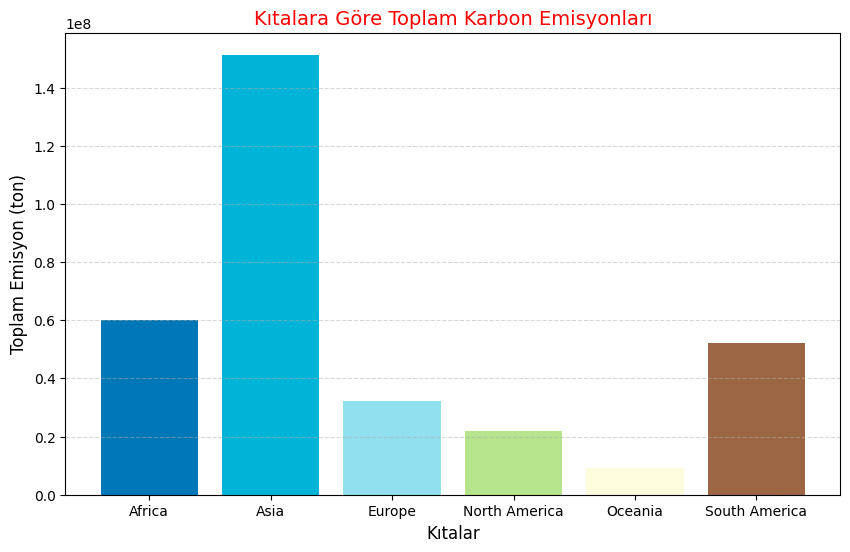

In [30]:
# Kıta bazında toplam karbon emisyonları (ton cinsinden)
continents = continent_emissions["Continent"]
emissions = continent_emissions["total_emission"]

# Bar chart oluşturma
plt.figure(figsize=(10, 6))
plt.bar(continents, emissions, color=["#0077b6", "#00b4d8", "#90e0ef", "#b5e48c", "#fdfcdc", "#9c6644"])
plt.title("Kıtalara Göre Toplam Karbon Emisyonları", fontsize=14, color='r')
plt.xlabel("Kıtalar", fontsize=12)
plt.ylabel("Toplam Emisyon (ton)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

7. Orman Yangınlarının Analizi ve Pie Chart

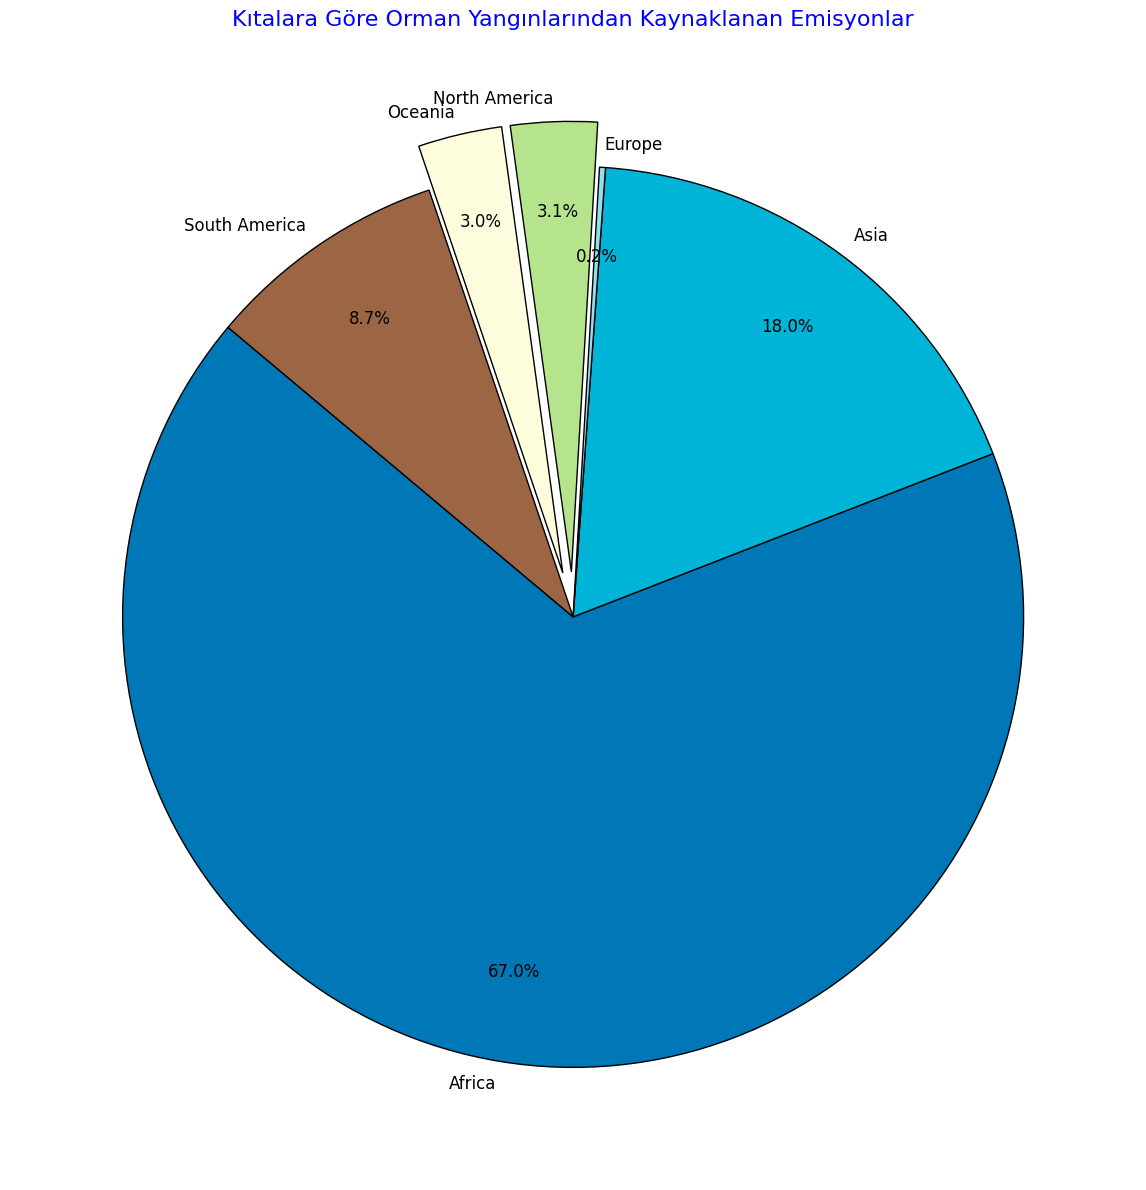

In [29]:
# Orman yangınları verisini analiz edelim
forest_fires_by_continent = df.groupby("Continent")["Forest fires"].sum().reset_index()

# Dilimleri birbirinden ayırmak için explode parametresi
explode = [0.1 if continent in ["Oceania", "North America"] else 0 for continent in forest_fires_by_continent["Continent"]]

# Pie chart oluşturma
plt.figure(figsize=(12, 12))  # Grafik boyutunu büyütüyoruz
wedges, texts, autotexts = plt.pie(
    forest_fires_by_continent["Forest fires"], 
    labels=forest_fires_by_continent["Continent"], 
    autopct='%1.1f%%',  # Tüm yüzdelik değerlerini göster
    startangle=140, 
    colors=["#0077b6", "#00b4d8", "#90e0ef", "#b5e48c", "#fdfcdc", "#9c6644"],
    pctdistance=0.8,  # Yüzdeliklerin konumunu ayarlamak
    labeldistance=1.05,  # Etiketlerin konumunu ayarlamak
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Dilimlere siyah kenarlık eklemek
    textprops={'fontsize': 12, 'color': 'black'},  # Yazı boyutunu ve rengini ayarlamak
    explode=explode  # Küçük dilimleri birbirinden ayır
)

# Yüzdeliklerin daha okunaklı olması için yazı boyutlarını ayarlayalım
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color("black")

# Etiketlerin daha okunaklı olması için yazı boyutlarını ayarlayalım
for text in texts:
    text.set_fontsize(12)

# Grafik başlığı
plt.title("Kıtalara Göre Orman Yangınlarından Kaynaklanan Emisyonlar", fontsize=16, color='b', pad=20)

# Grafik gösterimi
plt.tight_layout()  # Grafik öğelerinin birbirine girmesini önlemek için
plt.show()

8. Yıllara Göre Emisyon Trendleri

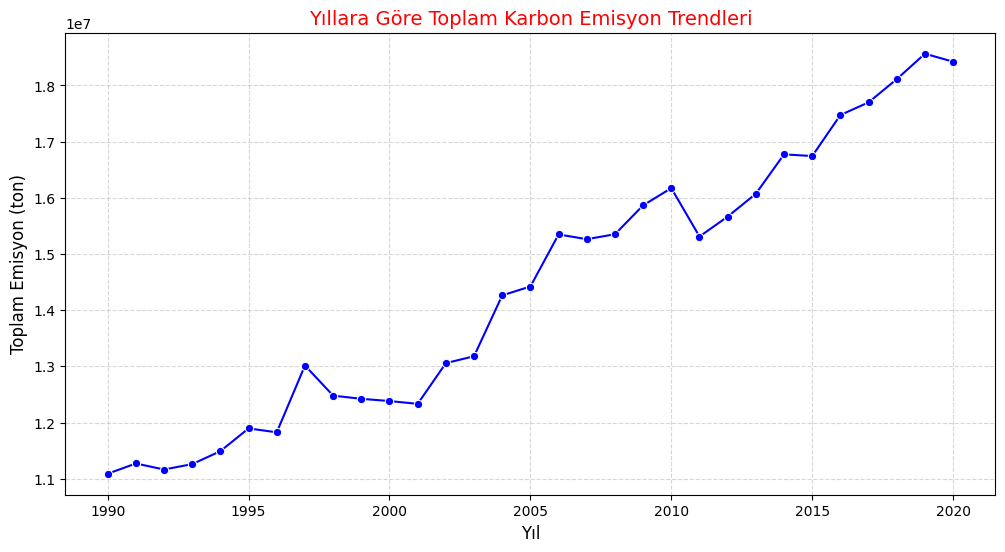

In [25]:
yearly_emissions = df.groupby("Year")["total_emission"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_emissions, x="Year", y="total_emission", marker="o", color="b")
plt.title("Yıllara Göre Toplam Karbon Emisyon Trendleri", fontsize=14, color='r')
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Toplam Emisyon (ton)", fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

9. Kıtalara Göre Yıllık Emisyon Trendleri

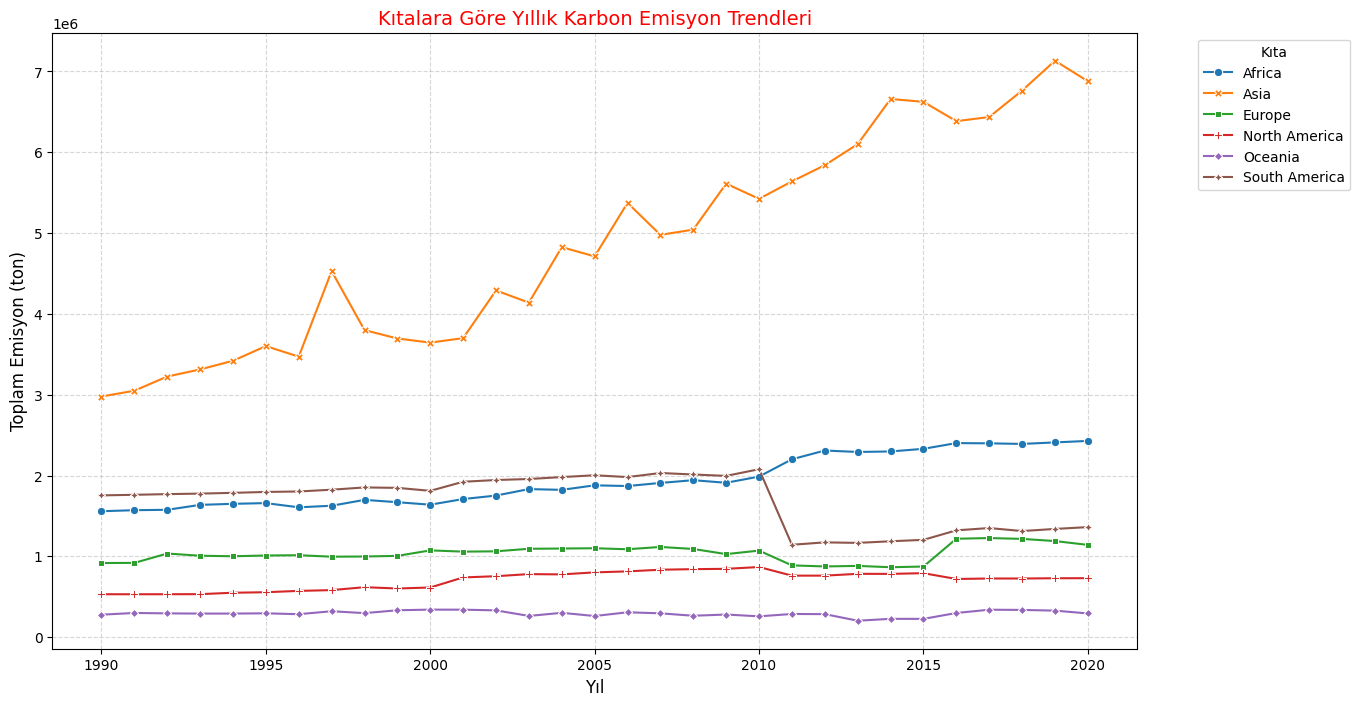

In [26]:
continent_yearly_emissions = df.groupby(["Continent", "Year"])["total_emission"].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=continent_yearly_emissions, x="Year", y="total_emission", hue="Continent", style="Continent", markers=True, dashes=False)
plt.title("Kıtalara Göre Yıllık Karbon Emisyon Trendleri", fontsize=14, color='r')
plt.xlabel("Yıl", fontsize=12)
plt.ylabel("Toplam Emisyon (ton)", fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.legend(title="Kıta", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()